In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
df.shape

(1000, 3)

<Axes: xlabel='placed', ylabel='cgpa'>

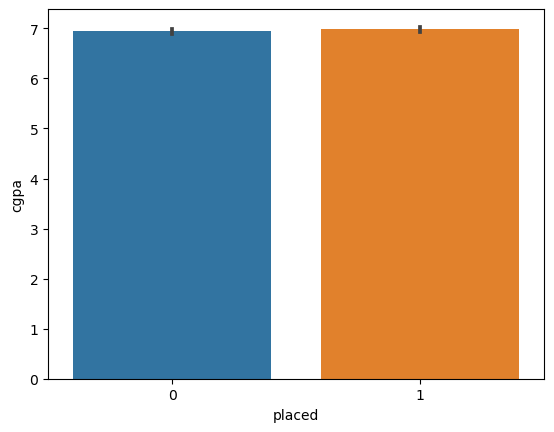

In [18]:
sns.barplot(data=df,x='placed',y='cgpa')

<Axes: xlabel='placed', ylabel='placement_exam_marks'>

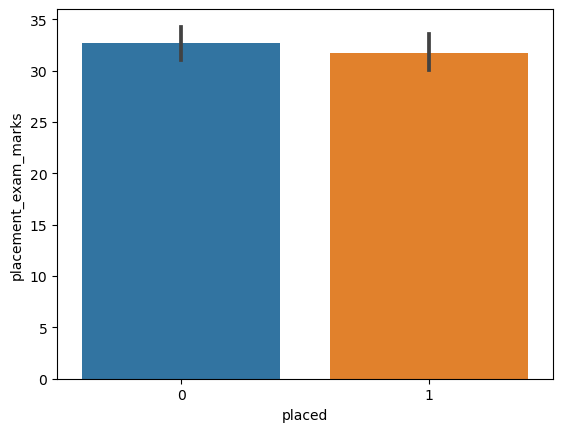

In [13]:
sns.barplot(data=df,x='placed',y='placement_exam_marks')

In [16]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='cgpa', ylabel='placement_exam_marks'>

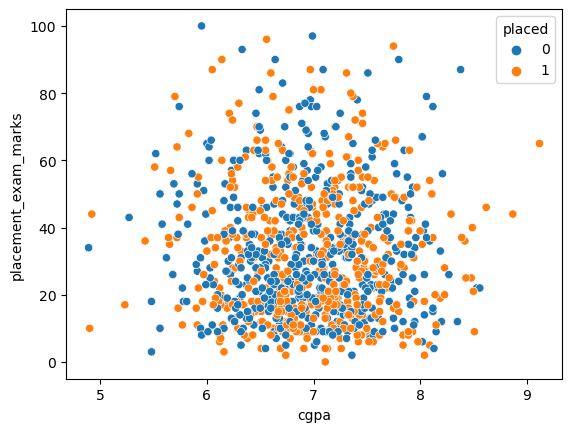

In [70]:
sns.scatterplot(data = df, x='cgpa',y ='placement_exam_marks',hue= 'placed')

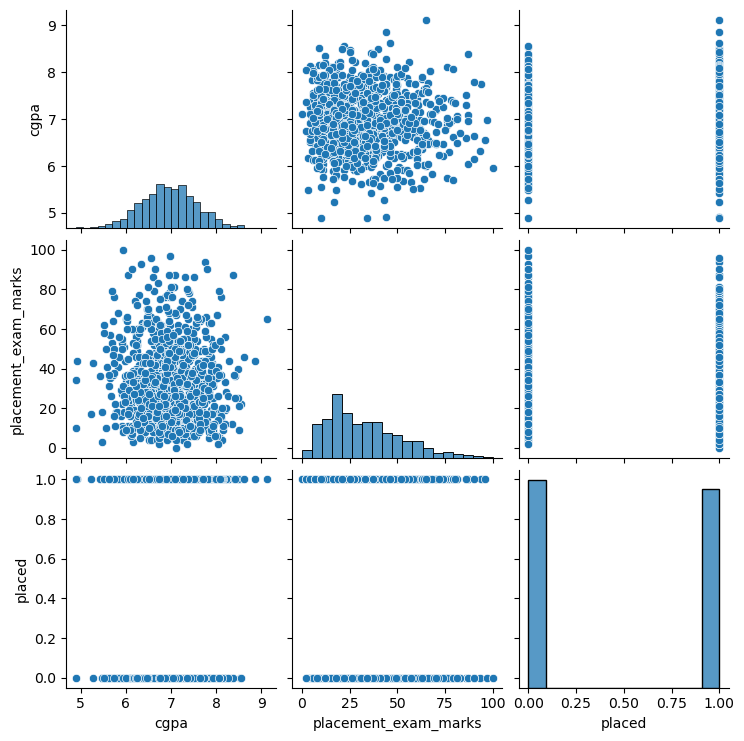

In [20]:
sns.pairplot(df)

In [65]:
df.corr()

,cgpa,placement_exam_marks,placed
cgpa,1.000000,-0.027371,0.027212
placement_exam_marks,-0.027371,1.000000,-0.025530
placed,0.027212,-0.025530,1.000000


<Axes: >

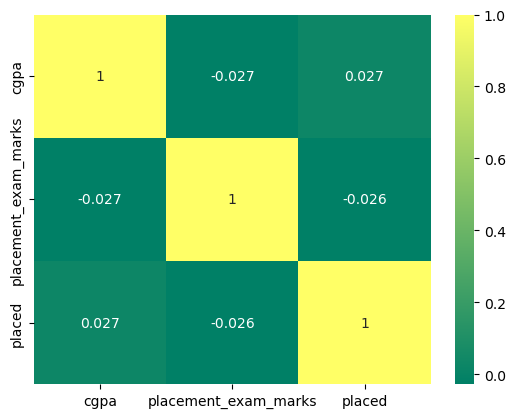

In [117]:
sns.heatmap(df.corr(),annot=True,cmap='summer')

In [71]:
from sklearn.model_selection import train_test_split

In [129]:
x = df.iloc[:,:1]
y = df.iloc[:,1:2]

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [131]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [132]:
pred = LR.predict(x_test)

In [133]:
y_test

,placement_exam_marks
37,9.0
726,25.0
846,97.0
295,64.0
924,23.0
...,...
894,16.0
540,63.0
567,36.0
641,22.0


In [134]:
from sklearn.metrics import mean_squared_error

In [135]:
mean_squared_error(pred, y_test)

330.44257875126823

In [136]:
from sklearn.tree import DecisionTreeRegressor
model_1 = DecisionTreeRegressor(max_leaf_nodes=5)
model_1.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

In [137]:
pred_new = model_1.predict(x_test)

In [139]:
mean_squared_error(pred_new, y_test)

339.8534708681007